In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [34]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

In [35]:
# Reshape the images to have a single color channel
# Fashion MNIST images are grayscale, so we need to add a dimension for the channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


# Update the input shape of the first layer to match the Fashion MNIST images
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])



In [36]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [37]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 34ms/step - accuracy: 0.7362 - loss: 0.7157 - val_accuracy: 0.8608 - val_loss: 0.3771
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.8764 - loss: 0.3407 - val_accuracy: 0.8828 - val_loss: 0.3260
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 32ms/step - accuracy: 0.8982 - loss: 0.2804 - val_accuracy: 0.8884 - val_loss: 0.2979
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9091 - loss: 0.2466 - val_accuracy: 0.8993 - val_loss: 0.2738
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9157 - loss: 0.2252 - val_accuracy: 0.8944 - val_loss: 0.2861
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9252 - loss: 0.2048 - val_accuracy: 0.9057 - val_loss: 0.2595
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9320 - loss: 0.1857 - val_accuracy: 0.8996 - val_loss: 0.2808
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9381 

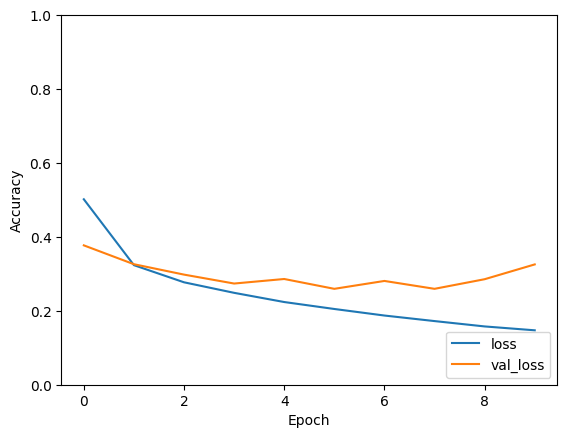

In [38]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()